In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/home-data-for-ml-course/train.csv")
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
test_data = pd.read_csv("/kaggle/input/home-data-for-ml-course/train.csv")
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data analysis before preprocess

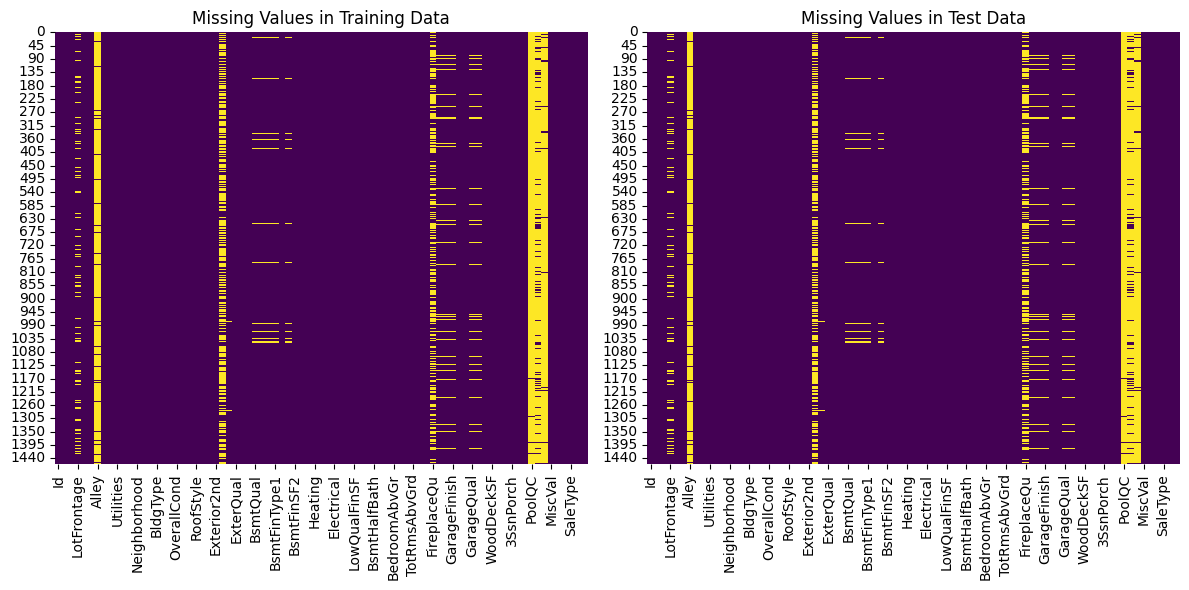

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Training Data Missing Values
sns.heatmap(train_data.isnull(), cbar=False, cmap="viridis", ax=axes[0])
axes[0].set_title("Missing Values in Training Data")

# Test Data Missing Values
sns.heatmap(test_data.isnull(), cbar=False, cmap="viridis", ax=axes[1])
axes[1].set_title("Missing Values in Test Data")

# Adjust layout
plt.tight_layout()
plt.show()

In [6]:
train_null_cols = train_data.isnull().sum()
print(train_null_cols[train_null_cols > 0])
print("length of train null cols:",train_null_cols[train_null_cols > 0].shape)

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64
length of train null cols: (19,)


In [7]:
test_null_cols = test_data.isnull().sum()
print(test_null_cols[test_null_cols > 0])
print("length of test null cols:",test_null_cols[test_null_cols > 0].shape)

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64
length of test null cols: (19,)


## Data cleaning

In [8]:
# Drop columns with more than 40% missing values
missing_threshold = 0.4
train_data = train_data.drop(columns=train_data.columns[train_data.isnull().mean() > missing_threshold])
test_data = test_data.drop(columns=test_data.columns[test_data.isnull().mean() > missing_threshold])

In [9]:
from sklearn.impute import SimpleImputer
# Fill missing values
imputer = SimpleImputer(strategy='median')
train_numeric_cols = train_data.select_dtypes(include=[np.number]).columns
train_data[train_numeric_cols] = imputer.fit_transform(train_data[train_numeric_cols])
test_numeric_cols = test_data.select_dtypes(include=[np.number]).columns
test_data[test_numeric_cols] = imputer.fit_transform(test_data[test_numeric_cols])

In [10]:
# Fill categorical missing values with 'None'
train_categorical_cols = train_data.select_dtypes(include=['object']).columns
train_data[train_categorical_cols] = train_data[train_categorical_cols].fillna('None')
test_categorical_cols = test_data.select_dtypes(include=['object']).columns
test_data[test_categorical_cols] = test_data[test_categorical_cols].fillna('None')

In [11]:
from sklearn.preprocessing import LabelEncoder
def encode_categorical_variables(data,categorical_cols):
    encoder = LabelEncoder()
    for col in categorical_cols:
        data[col] = encoder.fit_transform(data[col])
    return data

In [12]:
train_data = encode_categorical_variables(train_data,train_categorical_cols)
test_data = encode_categorical_variables(test_data,test_categorical_cols)

In [13]:
# Drop ID column (if present)
train_data = train_data.drop(columns=['Id'], errors='ignore')
test_data_id = test_data.Id.astype(int)
test_data = test_data.drop(columns=['Id'], errors='ignore')

## Feature selection

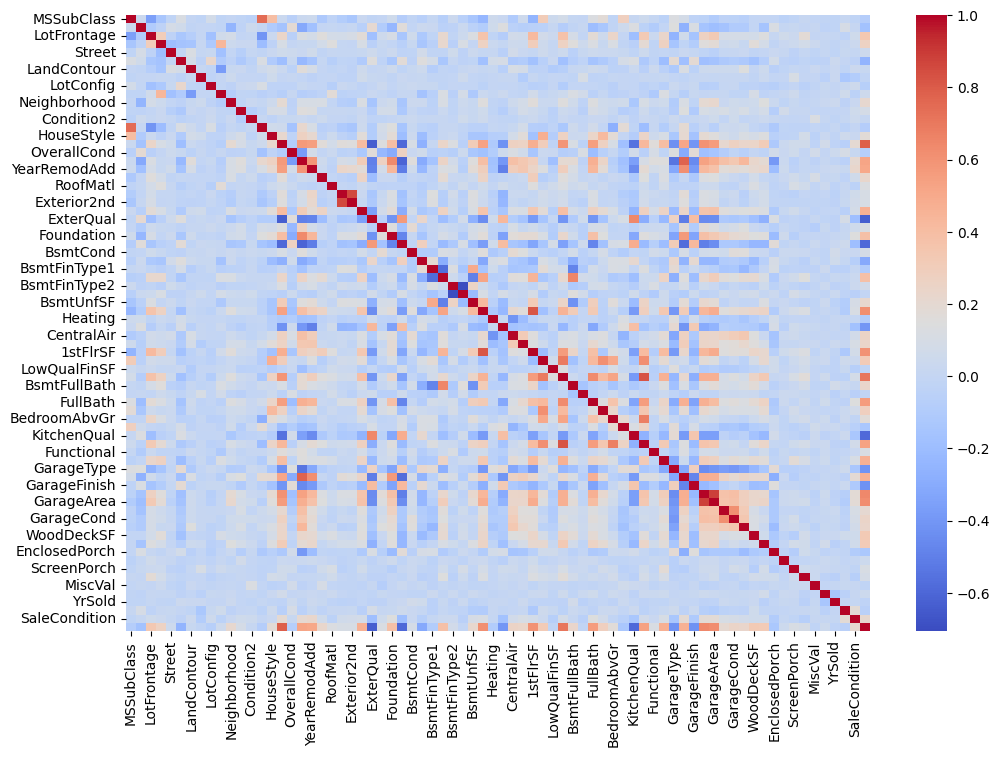

In [14]:
plt.figure(figsize=(12, 8))
corr_matrix = train_data.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.show()

In [15]:
# # Remove highly correlated features (>0.9 correlation)
# correlation_threshold = 0.9
# correlated_features = set()
# for i in range(len(corr_matrix.columns)):
#     for j in range(i):
#         if abs(corr_matrix.iloc[i, j]) > correlation_threshold:
#             colname = corr_matrix.columns[i]
#             correlated_features.add(colname)
# train = train.drop(columns=correlated_features)

In [16]:
from sklearn.ensemble import RandomForestRegressor
# Feature Selection using Random Forest
X = train_data.drop(columns=['SalePrice'])
y = train_data['SalePrice']
model = RandomForestRegressor()
model.fit(X, y)
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
# Select top 10 important features
selected_features = feature_importance.head(15).index
print(selected_features)

Index(['OverallQual', 'GrLivArea', 'TotalBsmtSF', '2ndFlrSF', 'BsmtFinSF1',
       '1stFlrSF', 'GarageCars', 'GarageArea', 'LotArea', 'YearBuilt',
       'Neighborhood', 'TotRmsAbvGrd', 'YearRemodAdd', 'LotFrontage',
       'FullBath'],
      dtype='object')


In [17]:
from sklearn.preprocessing import StandardScaler
X_selected = X[selected_features]
test_selected = test_data.drop(columns=['SalePrice'])[selected_features]

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)
test_scaled =  scaler.fit_transform(test_selected)

## model training

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [20]:
# Train models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Performance:")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"R2 Score: {r2_score(y_test, y_pred)}\n")

Linear Regression Performance:
MAE: 23738.978068975426
MSE: 1335383654.591027
R2 Score: 0.8086320275508487

Random Forest Performance:
MAE: 16727.850872907155
MSE: 657043902.2823739
R2 Score: 0.9058419211905329

Gradient Boosting Performance:
MAE: 17087.236213513926
MSE: 637162694.8327826
R2 Score: 0.9086910097999291



In [21]:
y_pred_for_submitted = models["Random Forest"].predict(test_scaled)

In [22]:
output = pd.DataFrame({'Id': range(1461, 1461 + len(y_pred_for_submitted)-1) , 'SalePrice': y_pred_for_submitted[1:]})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [23]:
output

,Id,SalePrice
0,1461,176500.500
1,1462,217991.840
2,1463,153275.500
3,1464,270980.040
4,1465,145238.650
...,...,...
1454,2915,176270.660
1455,2916,210073.500
1456,2917,260971.675
1457,2918,133538.875
